# predicting Churn using Decision tree classifier

In [1]:
import pandas as pd

df = pd.read_csv('Churn.csv')
df.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [2]:
df.drop('Phone',axis=1,inplace=True)
df.shape

(3333, 20)

Now we've to convert Categorical labels or non-numeric values columns into numeric ones.

In [3]:
df.replace(('no','yes'),(0,1), inplace=True)
df.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70,KS,415
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70,OH,415
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,NJ,415
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78,OH,408
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73,OK,415


# Exploratory Data Analysis

In [4]:
import matplotlib.pyplot as plt

In [5]:
xstates = df.groupby('State')['Churn'].mean()
xstates.head(10)

State
AK    0.057692
AL    0.100000
AR    0.200000
AZ    0.062500
CA    0.264706
CO    0.136364
CT    0.162162
DC    0.092593
DE    0.147541
FL    0.126984
Name: Churn, dtype: float64

Clearly, churn is dependent on the State , the customer lives in.

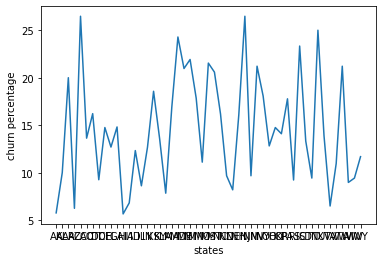

In [6]:
plt.plot(xstates.index, xstates.values*100)
plt.xlabel('states')
plt.ylabel('churn percentage')
plt.show()

Let's change this categorical value, 'State' with percentage churn it causes

In [7]:
df.replace(xstates.index, xstates.values*100, inplace=True)
df.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70,18.571429,415
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70,12.820513,415
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,26.470588,415
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78,12.820513,408
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73,14.754098,415


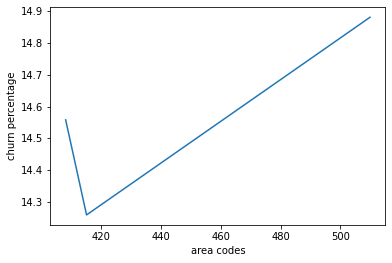

In [8]:
xarea = df.groupby('Area_Code')['Churn'].mean()

plt.plot(xarea.index, xarea.values*100)
plt.xlabel('area codes')
plt.ylabel('churn percentage')
plt.show()

Evidently enough, Area has it's effect on churn.
So, let's convert these categorical values into numeric ones.

In [9]:
df.replace(xarea.index, xarea.values*100, inplace=True)
df.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70,18.571429,14.259819
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70,12.820513,14.259819
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,26.470588,14.259819
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78,12.820513,14.558473
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73,14.754098,14.259819


we're done with the EDA.

## Now let's build decision tree classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier

tre=DecisionTreeClassifier()

In [36]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest= train_test_split(df.drop('Churn',axis=1), df['Churn'], test_size=0.02)

In [40]:
tre.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [38]:
c0 = ytest
c1 = tre.predict(xtest)

dicti={'values':c0, 'predictions':c1}
pred = pd.DataFrame(dicti)
pred.replace((0,1),('no','yes'), inplace=True)
pred.head(15)

,values,predictions
2105,no,no
1630,no,no
3073,no,no
1821,no,no
2552,no,no
1221,no,no
1204,yes,yes
1331,no,no
3325,no,no
2330,no,no


In [39]:
print(tre.score(xtest,ytest))

0.9402985074626866


94% accuracy !